**Repositorio de github:** https://github.com/lucioll/NaventDatosTP

## **Integrantes:**
* Fabrizio Cozza - 97402
* Luciano Giannotti - 97215
* Lucio López Lecube - 96583

## **Depuración de Datos**

![alternate text](http://oi64.tinypic.com/o9e1l3.jpg)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [4]:
postulantes_educacion = pd.read_csv('Data/fiuba_1_postulantes_educacion.csv')

In [5]:
postulantes_genero_edad = pd.read_csv('Data/fiuba_2_postulantes_genero_y_edad.csv')

In [6]:
vistas = pd.read_csv('Data/fiuba_3_vistas.csv')

In [7]:
postulaciones = pd.read_csv('Data/fiuba_4_postulaciones.csv')

In [8]:
avisos_online = pd.read_csv('Data/fiuba_5_avisos_online.csv')

In [9]:
avisos_detalle = pd.read_csv('Data/fiuba_6_avisos_detalle.csv')

In [10]:
avisos_detalle.loc[11096,"denominacion_empresa"] = "Portsaid"
avisos_detalle.loc[268,"denominacion_empresa"] = "Portsaid"
avisos_detalle.loc[267,"denominacion_empresa"] = "Portsaid"
avisos_detalle.loc[6262,"denominacion_empresa"] = "Mazalosa"
avisos_detalle.loc[3850,"denominacion_empresa"] = "Mazalosa"

In [11]:
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])

In [12]:
vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])

In [13]:
avisos_online['online'] = 1

In [14]:
listado_caracteres = ["</p>","<strong>","<p>","</strong>","<br />","<ul>","<li>","<u>","<em>",'<p align="center">',\
                        " </u>",'<span lang="ES">',"</em>","</a>","</span>","</u>","</li>","</ul>",'<p style="">',\
                        '<span style="">',"&quot",'<ul style="">','<li style="">','<div style="">','</div>',\
                        '<div>','<span lang="ES" style="">','<u style="">','<strong style="">',\
                        '<p align="center" style="">','<span style="text-decoration: underline;">','\r\n','\t',\
                        '<span>','<span style="text-decoration: line-through;">','<ol>','</ol>','ü','<p <p',\
                        '<span lang="es" style="">','<em style="">',"&gt"]
avisos_detalle['descripcion'].replace(regex=True,inplace=True,to_replace=listado_caracteres,value=r' ')

In [15]:
vistas.rename(index=str, columns={"idAviso": "idaviso", "timestamp": "timestamp", "idpostulante": "idpostulante"},inplace=True)

In [16]:
#HACER EL FILTRADO SEGUN EL MAYOR NIVEL DE EDUCACION

# **Análisis Exploratorio**

![alternate text](http://oi67.tinypic.com/2ll13yr.jpg)

## **Trabajando con el dataset de postulantes_educacion**

In [17]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [18]:
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [19]:
postulantes_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [20]:
vistas.head()

,idaviso,timestamp,idpostulante
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP


In [21]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [22]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13534 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [23]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13534 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


### Preferencia sexo

In [24]:
def preferencia_sexo(x):
    x = x.lower()
    if (x.rfind('femenino') != -1):
        return "femenino"
    if (x.rfind('masculino') != -1):
        return "masculino"
    else:
        return "indistinto"
    
avisos_detalle["preferencia_sexo"] = avisos_detalle["descripcion"].apply(preferencia_sexo)

## ¿De que son los trabajos que se necesita si o si determinado sexo?

![alternate text](https://s-i.huffpost.com/gen/2425876/images/o-GENDER-EQUALITY-facebook.jpg)

Text(0,0.5,'Cantidad de avisos')

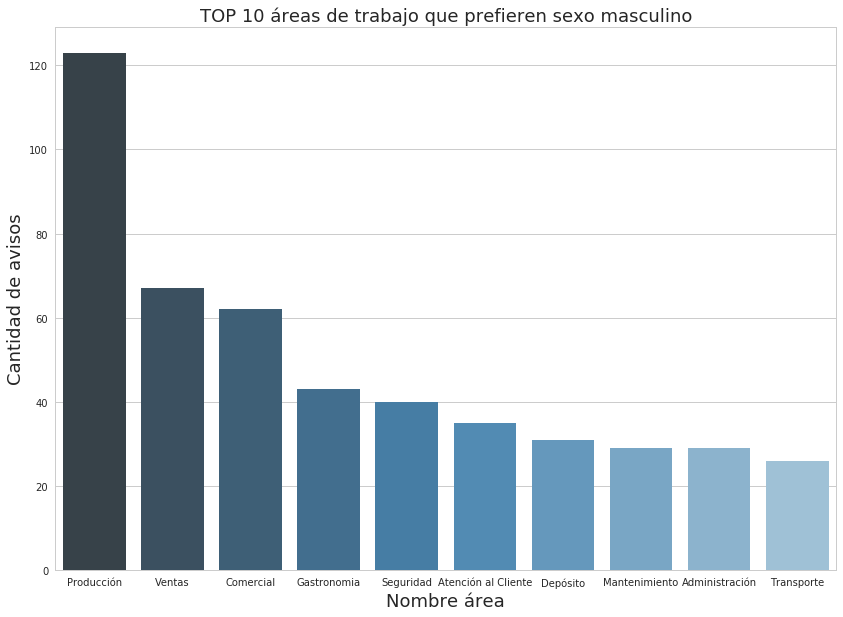

In [25]:
preferencias = avisos_detalle[avisos_detalle["preferencia_sexo"] == "masculino"]["nombre_area"].value_counts()[:10]
preferencias_index = ['Producción', 'Ventas', 'Comercial', 'Gastronomia', 'Seguridad',
       'Atención al Cliente', 'Depósito',
       'Mantenimiento', 'Administración', 'Transporte']

fig, ax = plt.subplots()
fig.set_size_inches(14.0, 10.0)


grafico = sns.barplot(x=preferencias_index, y=preferencias.values, orient="v", ax=ax, palette="Blues_d")
grafico.set_title("TOP 10 áreas de trabajo que prefieren sexo masculino", fontsize=18)
grafico.set_xlabel("Nombre área",fontsize=18)
grafico.set_ylabel("Cantidad de avisos", fontsize=18)

In [26]:
preferencias_index = ['Administración', 'Ventas', 'Recepcionista', 'Comercial',
       'Limpieza', 'Admin. de Personal',
       'Contabilidad', 'Atención al Cliente', 'Camareros', 'Seguridad']

Text(0,0.5,'Cantidad de avisos')

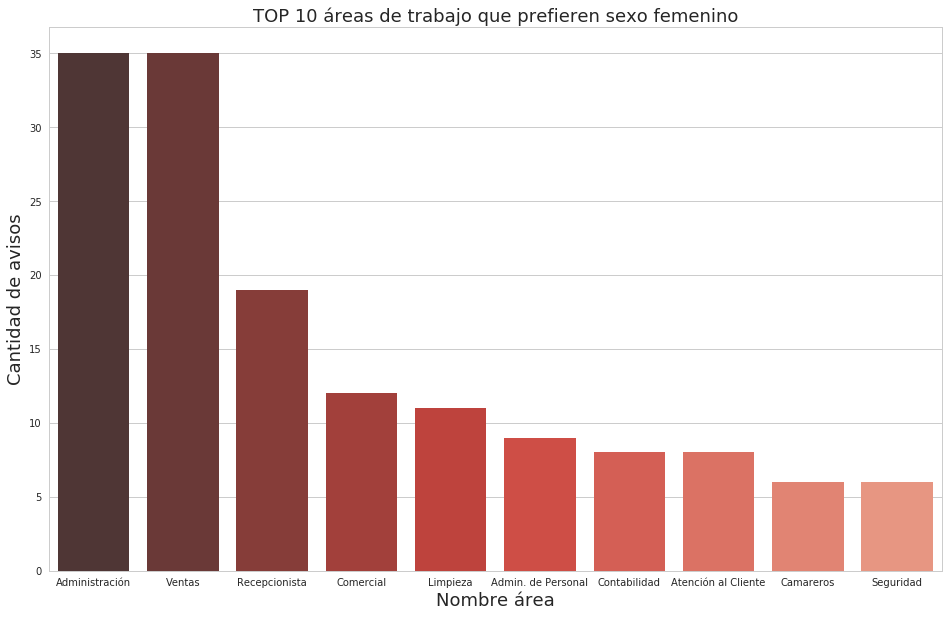

In [27]:
preferencias = avisos_detalle[avisos_detalle["preferencia_sexo"] == "femenino"]["nombre_area"].value_counts()[:10]
preferencias_index = ['Administración', 'Ventas', 'Recepcionista', 'Comercial',
       'Limpieza', 'Admin. de Personal',
       'Contabilidad', 'Atención al Cliente', 'Camareros', 'Seguridad']

fig, ax = plt.subplots()
fig.set_size_inches(16.0, 10.0)


grafico = sns.barplot(x=preferencias_index, y=preferencias.values, orient="v", ax=ax,palette="Reds_d")
grafico.set_title("TOP 10 áreas de trabajo que prefieren sexo femenino", fontsize=18)
grafico.set_xlabel("Nombre área",fontsize=18)
grafico.set_ylabel("Cantidad de avisos", fontsize=18)

## ¿Qué cantidad de postulantes hay según su nivel de estudio?

![alternate text](https://steemit-production-imageproxy-thumbnail.s3.amazonaws.com/U5dt6xNNFiYT3g9d99nz7JydYJen8Ue_1680x8400)

Text(0,0.5,'Nivel de estudio')

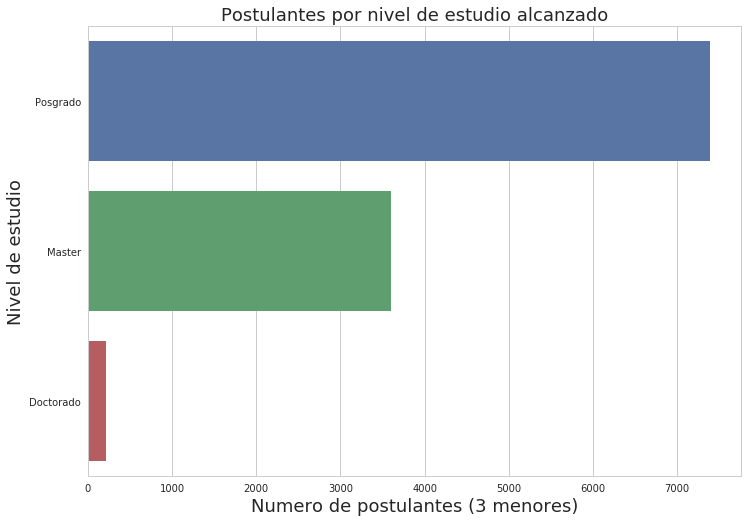

In [28]:
nombres_counts = postulantes_educacion["nombre"].value_counts()[4:]

grafico, ax = plt.subplots()
grafico.set_size_inches(11.7, 8.27)

grafico = sns.barplot(x=nombres_counts.values, y=nombres_counts.index, orient='h')
grafico.set_title("Postulantes por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Numero de postulantes (3 menores)",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=18)

## ¿Qué cantidad de postulantes hay según su nivel de estudio y su estado?

Text(0,0.5,'Nivel de estudio y estado en el que está')

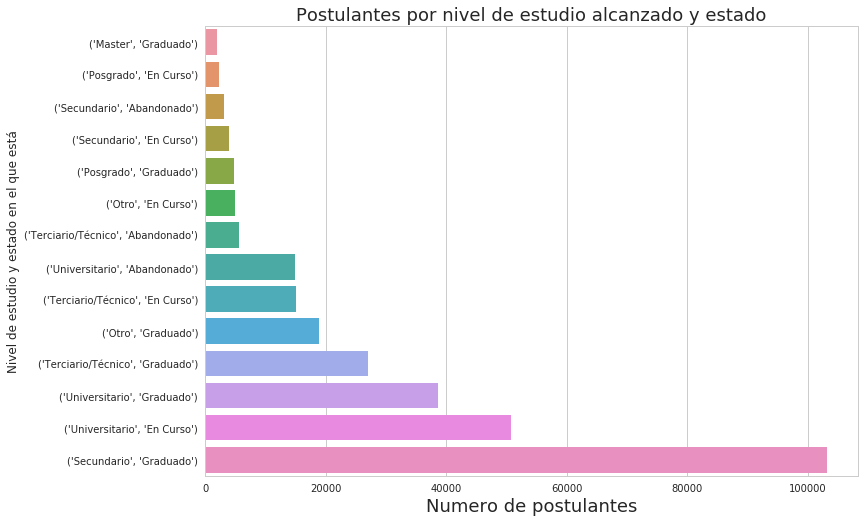

In [29]:
postulantes_x_estudioyestado = postulantes_educacion.groupby(["nombre","estado"]).size().sort_values()[7:]

grafico, ax = plt.subplots()
grafico.set_size_inches(11.7, 8.27)

grafico = sns.barplot(x=postulantes_x_estudioyestado.values, y=postulantes_x_estudioyestado.index, orient='h')
grafico.set_title("Postulantes por nivel de estudio alcanzado y estado", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio y estado en el que está", fontsize=12)

## ¿Qué cantidad de postulantes hay según máximo grado alcanzado?

Text(0,0.5,'Nivel de estudio')

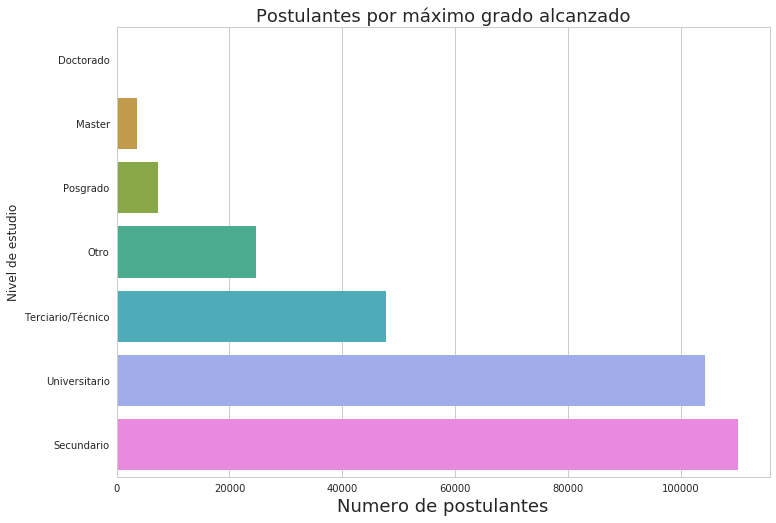

In [30]:
postulantes_x_estudio = postulantes_educacion.groupby(["nombre"]).size().sort_values()

grafico, ax = plt.subplots()
grafico.set_size_inches(11.7, 8.27)

grafico = sns.barplot(x=postulantes_x_estudio.values, y=postulantes_x_estudio.index, orient='h')
grafico.set_title("Postulantes por máximo grado alcanzado", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=12)

Text(0,0.5,'Cantidad de postulantes')

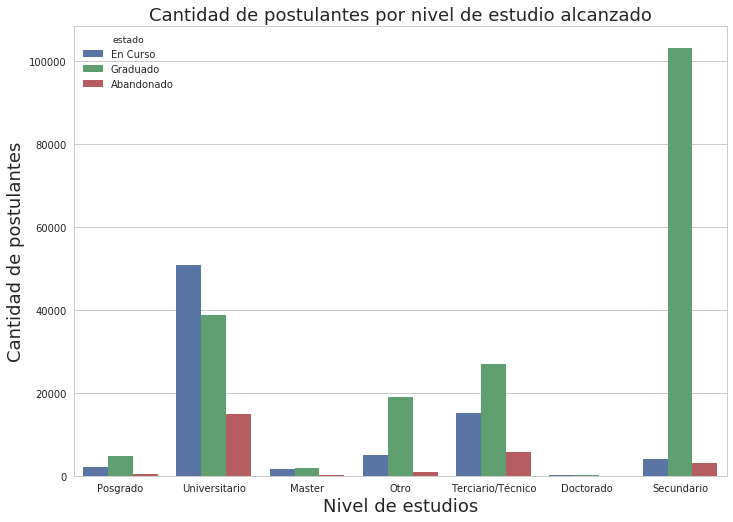

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="nombre", hue="estado", data=postulantes_educacion, ax=ax)
g.set_title("Cantidad de postulantes por nivel de estudio alcanzado", fontsize=18)
g.set_xlabel("Nivel de estudios", fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

## ¿Capacitación por parte de la empresa?

![alternate text](http://sinhvienusa.org/wp-content/uploads/2016/08/job-offer.png)

In [32]:
def ofrecen_capacitacion(x):
    x = x.lower()
    if x.rfind("capacitacion") != -1 or x.rfind("capacitación") != -1 or x.rfind("capacitaciones") != -1 \
            or x.rfind("formacion continua") != -1 or x.rfind("formacion continua") != -1:
        return True
    else:
        return False

In [33]:
avisos_detalle["ofrecen_capacitacion"] = avisos_detalle["descripcion"].apply(ofrecen_capacitacion)

Text(0.5,1,'¿Porcentaje de empresas que ofrecen capacitación?')

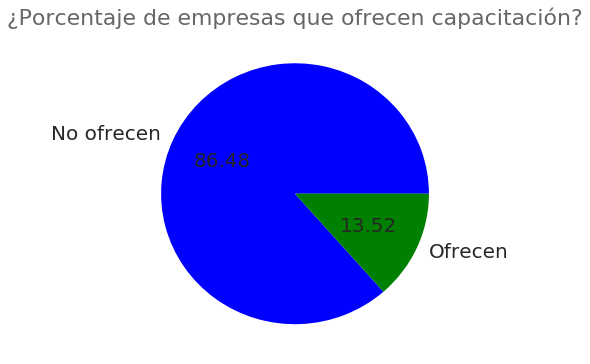

In [34]:
plt.axis('off')
ax = avisos_detalle.ofrecen_capacitacion.value_counts().plot(kind='pie',labels=['No ofrecen', 'Ofrecen',], \
                                                        colors=['b', 'g'], autopct='%.2f', \
                                                        fontsize=20, figsize=(6, 6))
ax.set_title("¿Porcentaje de empresas que ofrecen capacitación?", fontsize=22, alpha=0.7)

## ¿Cobertura medica por parte de la empresa?

In [35]:
def ofrecen_cobertura(x):
    x = x.lower()
    if x.rfind('medicina prepaga') != -1 or x.rfind("cobertura") != -1 or x.rfind("pre-paga") != -1 \
            or x.rfind("cobertura") != -1 or x.rfind("obra social") != -1 or x.rfind("seguro medico") != -1 \
            or x.rfind("osde") != -1 or x.rfind("swiss medical") != -1 or x.rfind("sancor salud") != -1 \
            or x.rfind("medicus") != -1 or x.rfind("medife") != -1 or x.rfind("medifé") != -1 \
            or x.rfind("galeno") != -1 or x.rfind("accord salud") != -1:
        return True
    else:
        return False

avisos_detalle["cobertura"] = avisos_detalle["descripcion"].apply(ofrecen_cobertura)

In [36]:
avisos_detalle["cobertura"].value_counts()

False    12206
True      1328
Name: cobertura, dtype: int64

Text(0.5,1,'¿Porcentaje de empresas que ofrecen cobertura médica?')

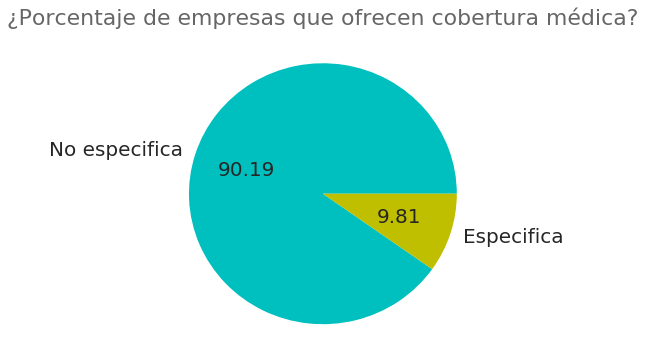

In [37]:
plt.axis('off')
ax = avisos_detalle.cobertura.value_counts().plot(kind='pie',labels=['No especifica', 'Especifica',], \
                                                        colors=['c', 'y'], autopct='%.2f', \
                                                        fontsize=20, figsize=(6, 6))
ax.set_title("¿Porcentaje de empresas que ofrecen cobertura médica?", fontsize=22, alpha=0.7)

## **Trabajando con el dataset postulantes_genero_edad**

In [38]:
postulantes_genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


![alternate text](https://ec.europa.eu/echo/sites/echo-site/files/styles/full-width/public/GA%20marker%20image.jpg?itok=1bAFEiA7)

In [39]:
postulantes_merge = pd.merge(postulantes_educacion,postulantes_genero_edad,how = 'inner',on = 'idpostulante')

In [40]:
postulantes_merge['sexo'].value_counts()

FEM           156968
MASC          137828
NO_DECLARA      3435
Name: sexo, dtype: int64

In [41]:
#Voy a agregar una columna con la edad ya calculada(estimando por 2017-año nacimiento) para cada registro
postulantes_merge["año"] = postulantes_merge[postulantes_merge["fechanacimiento"].notnull()]\
        ["fechanacimiento"].apply(lambda x: x[0:4])
postulantes_merge["edad"] = postulantes_merge[postulantes_merge["año"].notnull()] \
        ["año"].apply(lambda x: 2017 - int(x))

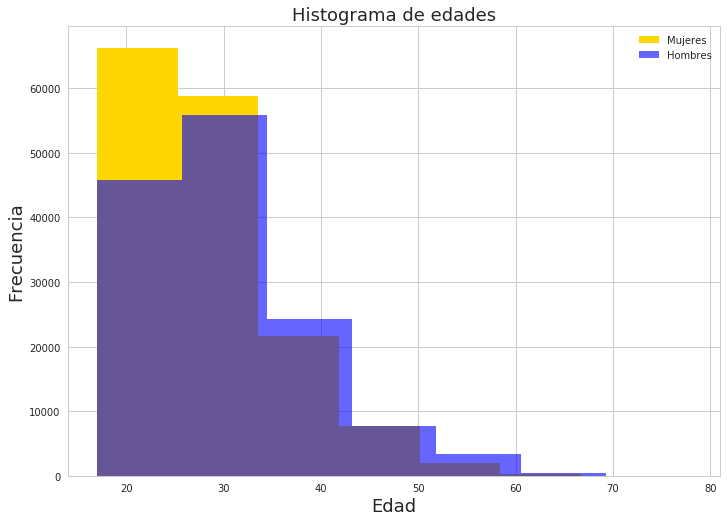

In [42]:
edades_sin_outsiders = postulantes_merge[(16 < postulantes_merge["edad"]) & (postulantes_merge["edad"] < 80)]
hombres = edades_sin_outsiders[edades_sin_outsiders["sexo"] == "MASC"]
mujeres = edades_sin_outsiders[edades_sin_outsiders["sexo"] == "FEM"]
g, ax = plt.subplots()
g.set_size_inches(11.7, 8.27)
g = mujeres["edad"].plot.hist(color='gold',bins=7)
g = hombres["edad"].plot.hist(color='blue',alpha=0.6,bins=7)
g.set_title("Histograma de edades", fontsize=18)
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)
g.legend(["Mujeres","Hombres"])

## ¿Que genero tiene mejor nivel de estudios?

Text(0,0.5,'Nivel de estudio')

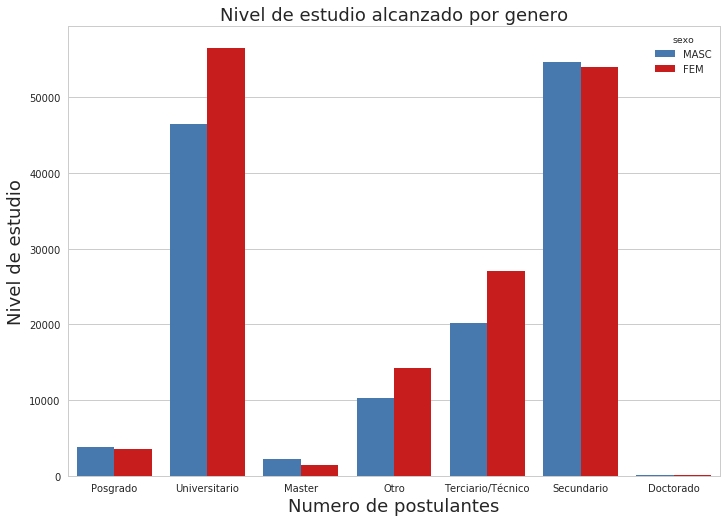

In [43]:
dato = postulantes_merge[postulantes_merge["sexo"] != "NO_DECLARA"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
colors = ["windows blue", "red"]
grafico = sns.countplot(x="nombre", hue="sexo",data=dato, ax=ax,palette=sns.xkcd_palette(colors))
grafico.set_title("Nivel de estudio alcanzado por genero", fontsize=18)
grafico.set_xlabel("Numero de postulantes",fontsize=18)
grafico.set_ylabel("Nivel de estudio", fontsize=18)

Text(0,0.5,'Edad')

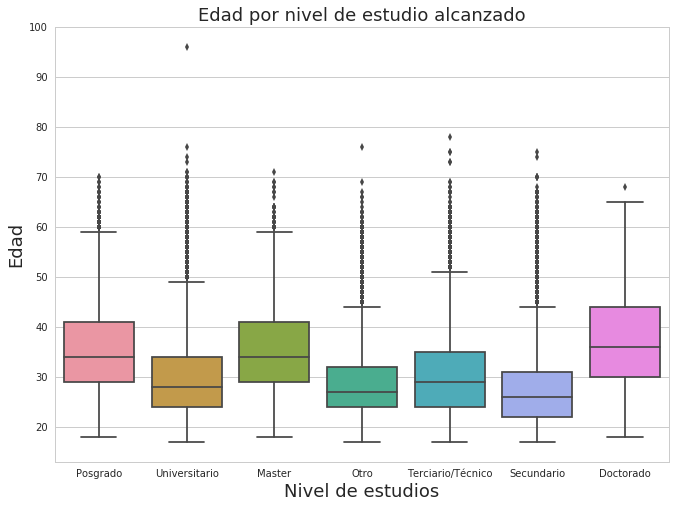

In [44]:
edad_x_nivelestudio = postulantes_merge[(16 < postulantes_merge["edad"]) & (postulantes_merge["edad"] < 100)]
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)

grafico = sns.boxplot(x="nombre", y="edad",data=edad_x_nivelestudio, ax=ax)
grafico.set_title("Edad por nivel de estudio alcanzado", fontsize=18)
grafico.set_xlabel("Nivel de estudios",fontsize=18)
grafico.set_ylabel("Edad", fontsize=18)

## **Trabajando con el dataset de postulaciones**

## ¿Que empresas están relacionadas con los avisos a los cuales más se postularon?

![alternate text](http://nextgennetworking.com/ngn/images/intro_ship.png)

Text(0.5,0,'Empresa asociada al aviso')

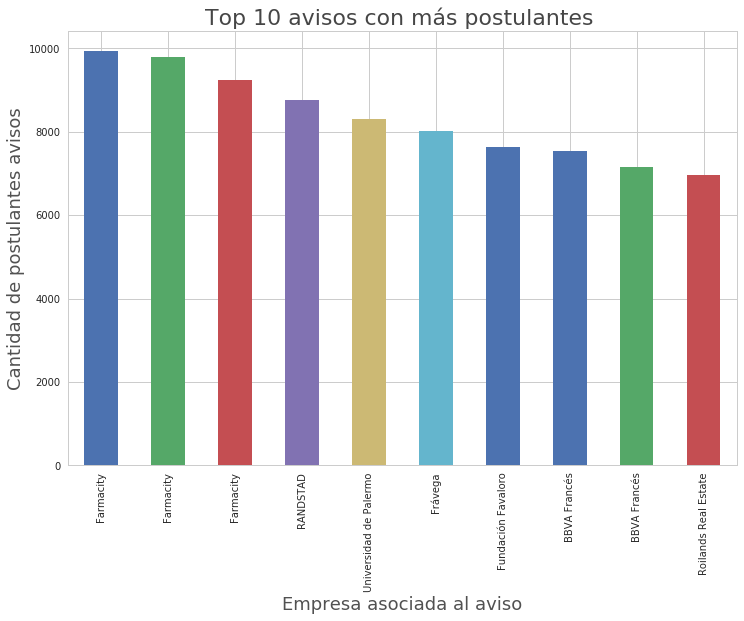

In [45]:
post_x_aviso = postulaciones['idaviso'].value_counts().sort_values(ascending=False)
top10avisos = post_x_aviso.head(10)
top10avisos = pd.DataFrame({'idaviso':top10avisos.index, 'count':top10avisos.values})
av_det_empresas = avisos_detalle.loc[:,['idaviso','denominacion_empresa']]
top10avisosempresas = pd.merge(top10avisos,av_det_empresas,how='inner',on='idaviso') 
top10avisosempresas = top10avisosempresas.set_index('denominacion_empresa')
ax = top10avisosempresas['count'].plot(kind='bar', figsize=(12,8),title='Top 10 avisos con más postulantes ')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de postulantes avisos', fontsize=18, alpha=0.8)
ax.set_xlabel('Empresa asociada al aviso', fontsize=18, alpha=0.8)

## ¿Postulaciones por meses, días y horas?

![alternate text](http://oi65.tinypic.com/11hc41v.jpg)

In [46]:
def mes_name(x):
    if(x == 1):
        return 'Enero'
    if(x == 2):
        return 'Febrero'
    if(x == 3):
        return 'Marzo'
    if(x == 4):
        return 'Abril'
    if(x == 5):
        return 'Mayo'
    if(x == 6):
        return 'Junio'
    if(x == 7):
        return 'Julio'
    if(x == 8):
        return 'Agosto'
    if(x == 9):
        return 'Septiembre'
    if(x == 10):
        return 'Octubre'
    if(x == 11):
        return 'Noviembre'
    if(x == 12):
        return 'Diciembre'

Text(0.5,0,'Meses')

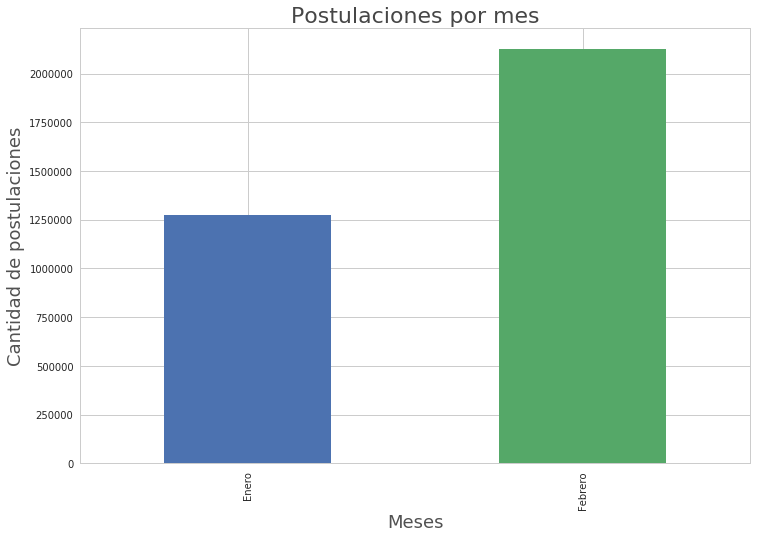

In [47]:
postulaciones['month'] = postulaciones['fechapostulacion'].dt.month
postulaciones['month_name'] = postulaciones['month'].apply(mes_name)
ax = postulaciones.groupby('month_name').size().plot(kind='bar', figsize=(12,8),title='Postulaciones por mes')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de postulaciones', fontsize=18, alpha=0.8)
ax.set_xlabel('Meses', fontsize=18, alpha=0.8)

Text(0.5,0,'Día de la semana')

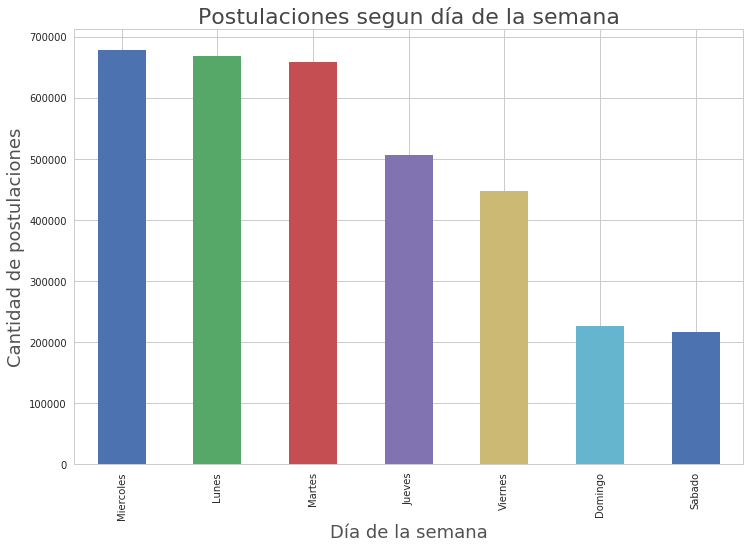

In [48]:
postulaciones['days'] = postulaciones['fechapostulacion'].dt.dayofweek
diasDeLaSemana = postulaciones.groupby('days').size().sort_values(ascending=False)
diasDeLaSemana = diasDeLaSemana.rename({0: 'Lunes',\
                       1: 'Martes',\
                       2: 'Miercoles',\
                       3: 'Jueves',\
                       4: 'Viernes',\
                       5: 'Sabado',\
                       6: 'Domingo'})
diasDeLaSemana.plot(kind='bar',figsize=(12,8));
ax = diasDeLaSemana.plot(kind='bar',figsize=(12,8),title='Postulaciones segun día de la semana')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de postulaciones', fontsize=18, alpha=0.8)
ax.set_xlabel('Día de la semana', fontsize=18, alpha=0.8)

Text(0.5,0,'Horas')

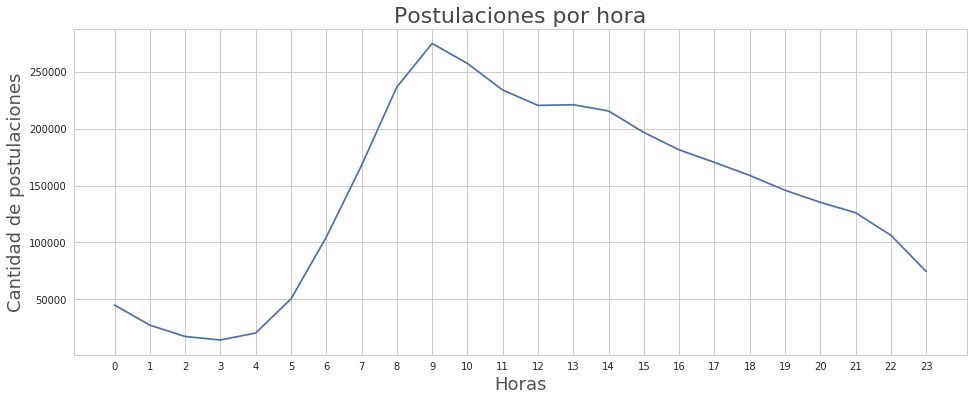

In [50]:
postulaciones['hours'] = postulaciones['fechapostulacion'].dt.hour
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks(x)
ax = postulaciones.groupby('hours').count()['idpostulante'].plot(figsize=(16,6),title='Postulaciones por hora')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de postulaciones', fontsize=18, alpha=0.8)
ax.set_xlabel('Horas', fontsize=18, alpha=0.8)

## ¿Postulantes que más se postularon?

![alternate text](http://knowledge.essec.edu/media/cache/26/76/2676d3f8b19d2b1b0574ca3793cb8a9a.jpg)

Text(0,0.5,'Postulantes')

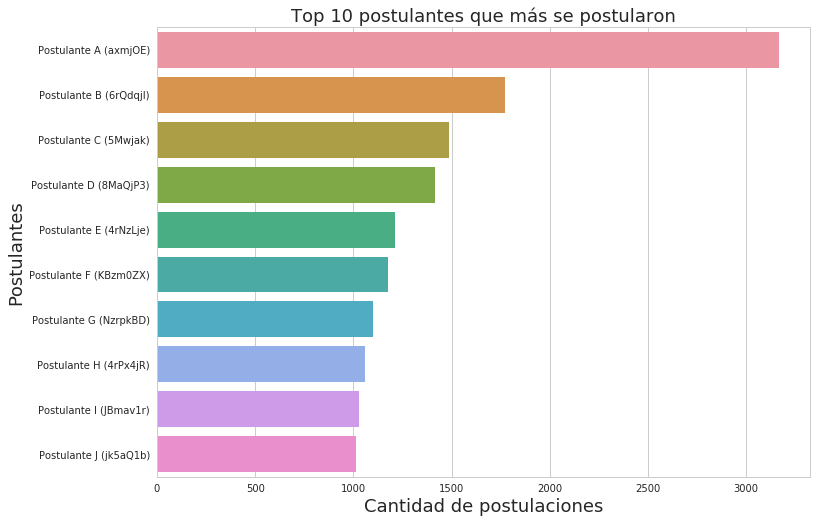

In [71]:
post_x_aviso = postulaciones['idpostulante'].value_counts().sort_values(ascending=False)
top10postulantes = post_x_aviso.head(10)
top10postulantes = top10postulantes.rename({'axmjOE': 'Postulante A (axmjOE)', 
                         '6rQdqjl': 'Postulante B (6rQdqjl)', 
                         '5Mwjak': 'Postulante C (5Mwjak)', 
                         '8MaQjP3': 'Postulante D (8MaQjP3)', 
                         '4rNzLje': 'Postulante E (4rNzLje)', 
                         'KBzm0ZX': 'Postulante F (KBzm0ZX)', 
                         'NzrpkBD': 'Postulante G (NzrpkBD)', 
                         '4rPx4jR': 'Postulante H (4rPx4jR)', 
                         'JBmav1r': 'Postulante I (JBmav1r)', 
                         'jk5aQ1b': 'Postulante J (jk5aQ1b)'})
ax, ax2 = plt.subplots()
ax.set_size_inches(11.7, 8.27)

ax = sns.barplot(x=top10postulantes.values, y=top10postulantes.index, orient='h')

ax.set_title("Top 10 postulantes que más se postularon", fontsize=18)
ax.set_xlabel("Cantidad de postulaciones",fontsize=18)
ax.set_ylabel("Postulantes", fontsize=18)

## **Trabajando con el dataset de vistas**

In [51]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idaviso         961897 non-null int64
timestamp       961897 non-null datetime64[ns]
idpostulante    961897 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 29.4+ MB


## ¿Postulantes que más visitaron?

Text(0,0.5,'Postulantes')

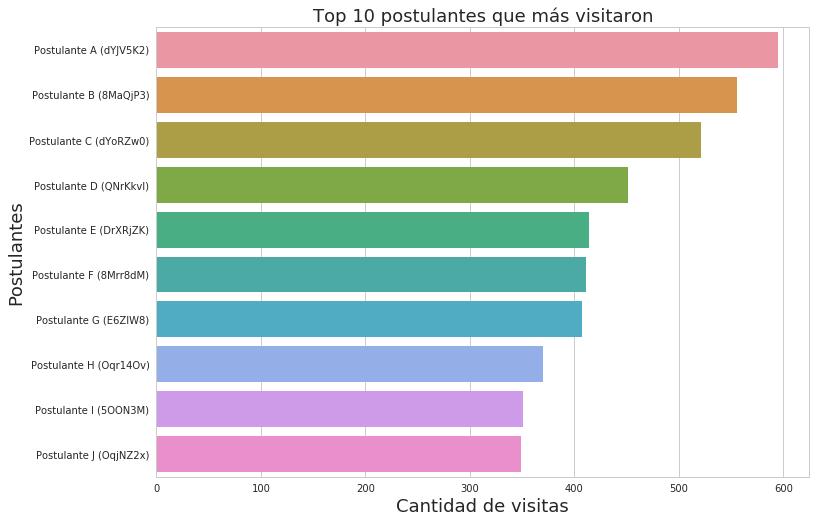

In [72]:
vista_x_postulante = vistas['idpostulante'].value_counts().sort_values(ascending=False)
top10postvistas = vista_x_postulante.head(10)
top10postvistas
top10postvistas = top10postvistas.rename({'dYJV5K2': 'Postulante A (dYJV5K2)', 
                         '8MaQjP3': 'Postulante B (8MaQjP3)', 
                         'dYoRZw0': 'Postulante C (dYoRZw0)', 
                         'QNrKkvl': 'Postulante D (QNrKkvl)', 
                        'DrXRjZK': 'Postulante E (DrXRjZK)', 
                         '8Mrr8dM': 'Postulante F (8Mrr8dM)', 
                         'E6ZlW8': 'Postulante G (E6ZlW8)', 
                        'Oqr14Ov': 'Postulante H (Oqr14Ov)', 
                       '5OON3M': 'Postulante I (5OON3M)', 
                         'OqjNZ2x': 'Postulante J (OqjNZ2x)'})

ax, ax2 = plt.subplots()
ax.set_size_inches(11.7, 8.27)

ax = sns.barplot(x=top10postvistas.values, y=top10postvistas.index, orient='h')
ax.set_title("Top 10 postulantes que más visitaron", fontsize=18)
ax.set_xlabel("Cantidad de visitas",fontsize=18)
ax.set_ylabel("Postulantes", fontsize=18)

## ¿Que empresas están relacionadas con los avisos que más se vieron?

Text(0.5,0,'Empresa asociada al aviso')

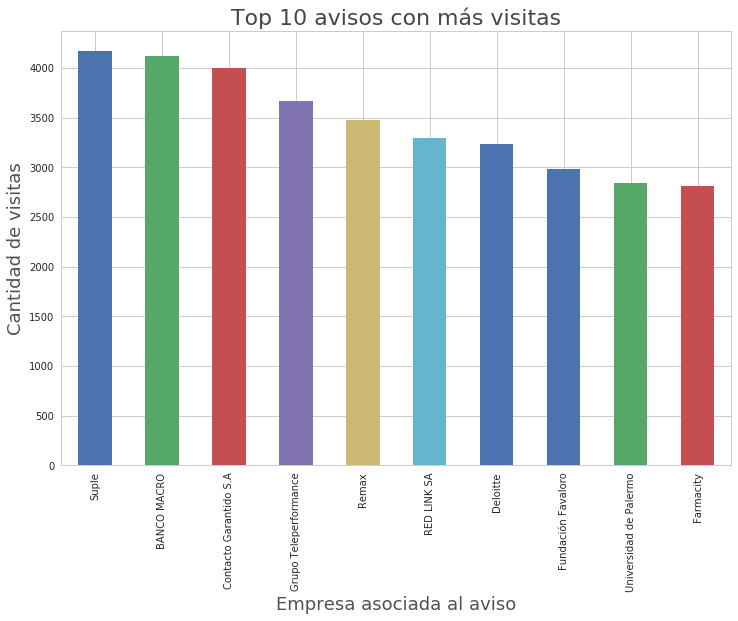

In [52]:
vista_x_aviso = vistas['idaviso'].value_counts().sort_values(ascending=False)
top10vistos = vista_x_aviso.head(10)
top10vistos = pd.DataFrame({'idaviso':top10vistos.index, 'count':top10vistos.values})
av_det_vistas_empresas = avisos_detalle.loc[:,['idaviso','denominacion_empresa']]
top10vistosempresas = pd.merge(top10vistos,av_det_vistas_empresas,how='inner',on='idaviso') 
top10vistosempresas = top10vistosempresas.set_index('denominacion_empresa')
ax = top10vistosempresas['count'].plot(kind='bar', figsize=(12,8),title='Top 10 avisos con más visitas')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de visitas', fontsize=18, alpha=0.8)
ax.set_xlabel('Empresa asociada al aviso', fontsize=18, alpha=0.8)

## ¿Vistas por días y horas?

Text(0.5,0,'Horas')

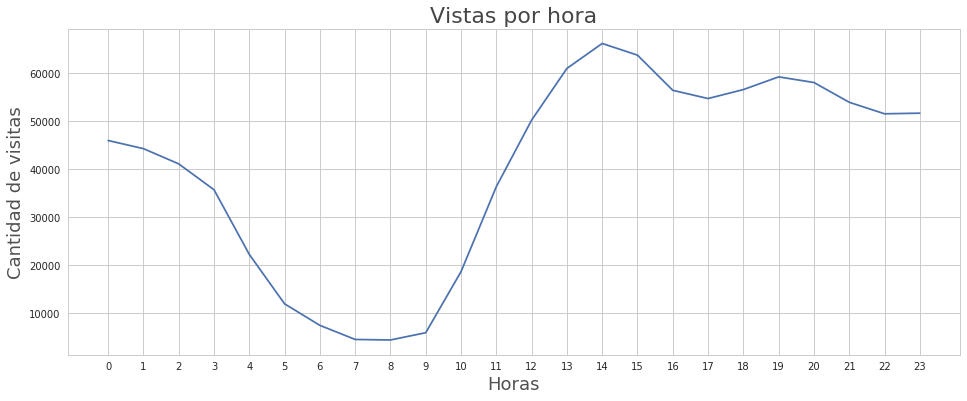

In [54]:
vistas['hours'] = vistas['timestamp'].dt.hour

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.xticks(x)
ax = vistas.groupby('hours').count()['idpostulante'].plot(figsize=(16,6),title='Vistas por hora')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de visitas', fontsize=18, alpha=0.8)
ax.set_xlabel('Horas', fontsize=18, alpha=0.8)

Text(0.5,0,'Día de la semana')

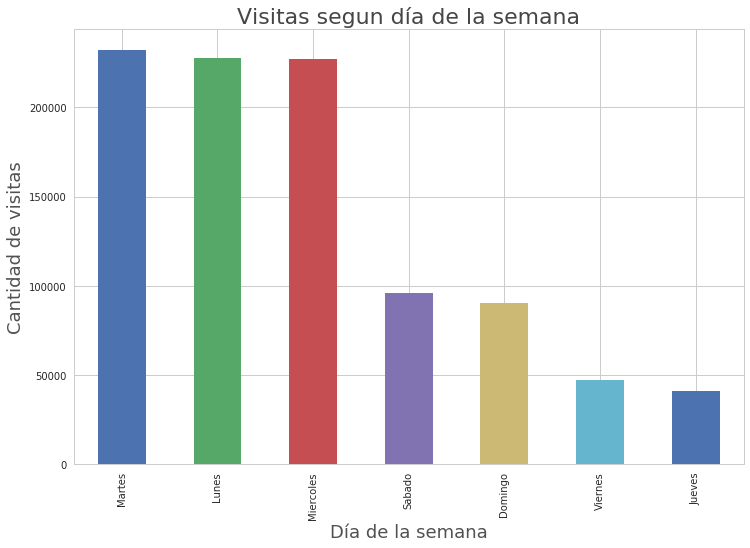

In [55]:
vistas['days'] = vistas['timestamp'].dt.dayofweek
diasDeLaSemanaVistas = vistas.groupby('days').size().sort_values(ascending=False)
diasDeLaSemanaVistas = diasDeLaSemanaVistas.rename({0: 'Lunes',\
                       1: 'Martes',\
                       2: 'Miercoles',\
                       3: 'Jueves',\
                       4: 'Viernes',\
                       5: 'Sabado',\
                       6: 'Domingo'})
ax = diasDeLaSemanaVistas.plot(kind='bar',figsize=(12,8),title='Visitas segun día de la semana')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de visitas', fontsize=18, alpha=0.8)
ax.set_xlabel('Día de la semana', fontsize=18, alpha=0.8)

## **Trabajando con el dataset de avisos detalle/online**

![alternate text](http://theknowledgeengineers.com/wp-content/uploads/2016/03/mobile-advertising-1.png)

In [56]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 14 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13534 non-null object
preferencia_sexo        13534 non-null object
ofrecen_capacitacion    13534 non-null bool
cobertura               13534 non-null bool
dtypes: bool(2), int64(2), object(10)
memory usage: 1.3+ MB


## ¿Avisos según conexión?

In [57]:
avisos=avisos_detalle.merge(avisos_online,left_on='idaviso',right_on='idaviso',how='outer')
avisos['online']=avisos['online'].fillna(0)
# 1 es online, 0 es offline

Text(0.5,0,'Estado')

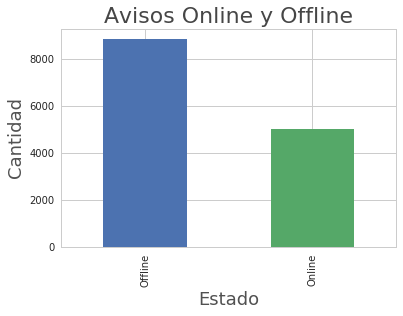

In [58]:
ax = avisos.groupby('online').size()
ax = ax.rename({0.0: 'Offline',1: 'Online'})
ax = ax.plot.bar(title='Avisos Online y Offline')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad', fontsize=18, alpha=0.8)
ax.set_xlabel('Estado', fontsize=18, alpha=0.8)

## ¿Áreas que colocaron más avisos?

Text(0.5,0,'Áreas')

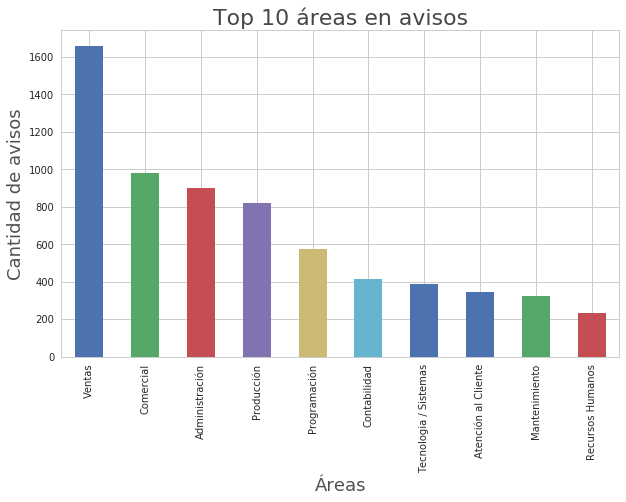

In [73]:
ax = avisos['nombre_area'].value_counts().head(10).plot(kind='bar',figsize=(10,6),title='Top 10 áreas en avisos')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de avisos', fontsize=18, alpha=0.8)
ax.set_xlabel('Áreas', fontsize=18, alpha=0.8)

## ¿Empresas que colocaron más avisos?

Text(0.5,0,'Empresas')

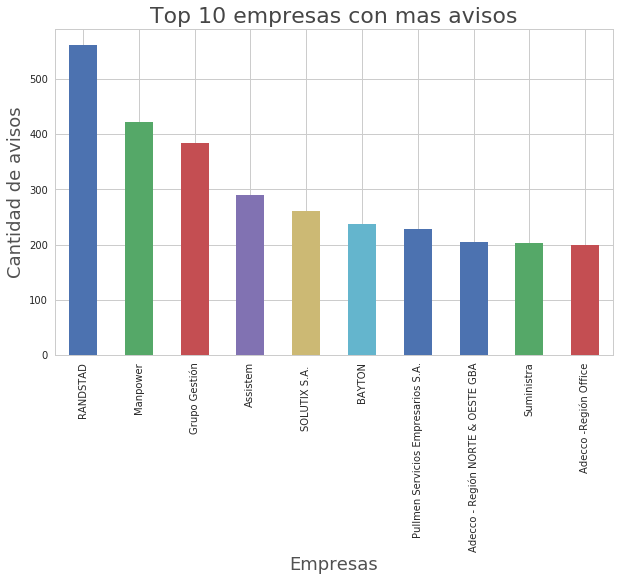

In [74]:
ax = avisos['denominacion_empresa'].value_counts().head(10).plot(kind='bar',figsize=(10,6),title='Top 10 empresas con mas avisos');
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de avisos', fontsize=18, alpha=0.8)
ax.set_xlabel('Empresas', fontsize=18, alpha=0.8)

## ¿Cantidad de avisos según el nivel laboral?

Text(0.5,0,'Nivel laboral')

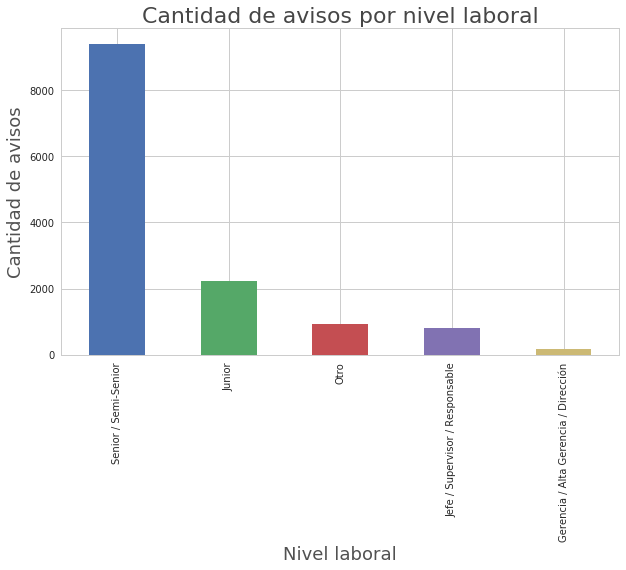

In [61]:
ax = avisos['nivel_laboral'].value_counts().plot(kind='bar',figsize=(10,6),title='Cantidad de avisos por nivel laboral');
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_ylabel('Cantidad de avisos', fontsize=18, alpha=0.8)
ax.set_xlabel('Nivel laboral', fontsize=18, alpha=0.8)

## ¿Lenguajes de programación más solicitados en área tecnología/programación?

![alternate text](https://venturebeat.com/wp-content/uploads/2017/10/language-brain.jpg?fit=578%2C311&strip=all)

In [62]:
def lenguajes_mas_usados(x):
    x = x.lower()
    if x.rfind("javascript") != -1:
        return "JavaScript"
    if x.rfind("python") != -1:
        return "Python"
    if x.rfind("java") != -1:
        return "Java"
    if x.rfind("ruby") != -1:
        return "Ruby"
    if x.rfind("php") != -1:
        return "PHP"
    if x.rfind("c++") != -1:
        return "C++"
    if x.rfind("css") != -1:
        return "CSS"
    if x.rfind("c#") != -1:
        return "C#"
    if x.rfind("shell") != -1:
        return "Shell"
    if x.rfind("swift") != -1:
        return "Swift"
    if x.rfind("objective-c") != -1:
        return "Objective-C"
    if x.rfind("typescript") != -1:
        return "TypeScript"
    else:
        return "Sin lenguaje"

In [63]:
pd.options.mode.chained_assignment = None

In [64]:
av_det_sistemas = avisos_detalle.loc[avisos_detalle.nombre_area.str.contains('Tecnologia / Sistemas')
                                     |
                                     avisos_detalle.nombre_area.str.contains('Programación'),:]
av_det_sistemas["leng_prog"] = av_det_sistemas["descripcion"].apply(lenguajes_mas_usados)

Text(0,0.5,'Cantidad de empresas que solicitan')

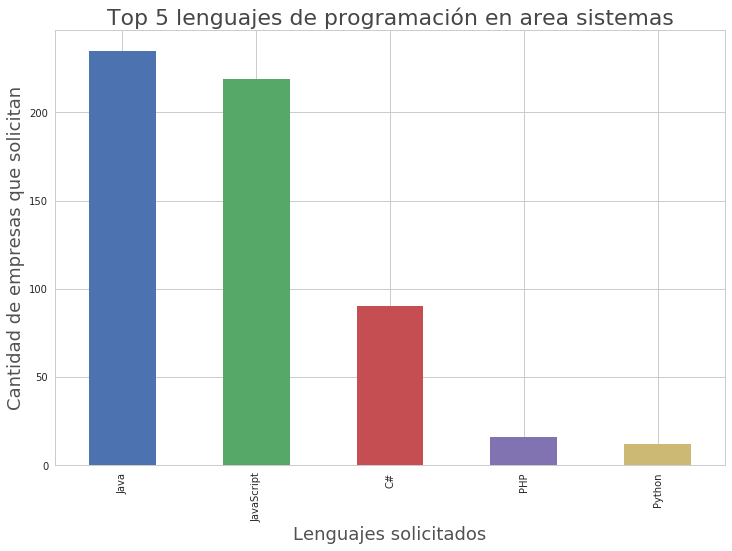

In [65]:
t5lenguajes = av_det_sistemas["leng_prog"].value_counts().sort_values(ascending=False)[1:6]
ax = t5lenguajes.plot(kind='bar', figsize=(12,8),title='Top 5 lenguajes de programación en area sistemas')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_xlabel('Lenguajes solicitados', fontsize=18, alpha=0.8)
ax.set_ylabel('Cantidad de empresas que solicitan', fontsize=18, alpha=0.8)

## ¿Idiomas más solicitados?

In [66]:
def idiomas_mas_usados(x):
    x = x.lower()
    if x.rfind("ingles") != -1 or  x.rfind("inglés") != -1:
        return "Inglés"
    if x.rfind("portugués") != -1 or  x.rfind("portugues") != -1:
        return "Portugués"
    if x.rfind("chino") != -1:
        return "Chino"
    if x.rfind("japonés") != -1 or x.rfind("japones") != -1:
        return "Japonés"
    if x.rfind("ruso") != -1:
        return "Ruso"
    if x.rfind("aleman") != -1 or x.rfind("alemán") != -1:
        return "Alemán"
    if x.rfind("hindú") != -1 or x.rfind("hindu") != -1:
        return "Hindú"
    if x.rfind("francés") != -1 or x.rfind("frances") != -1:
        return "Francés"
    else:
        return "No especifica"

In [67]:
av_det_idiomas = avisos_detalle
av_det_idiomas['idiomas'] = avisos_detalle["descripcion"].apply(idiomas_mas_usados)

Text(0,0.5,'Cantidad de empresas que solicitan')

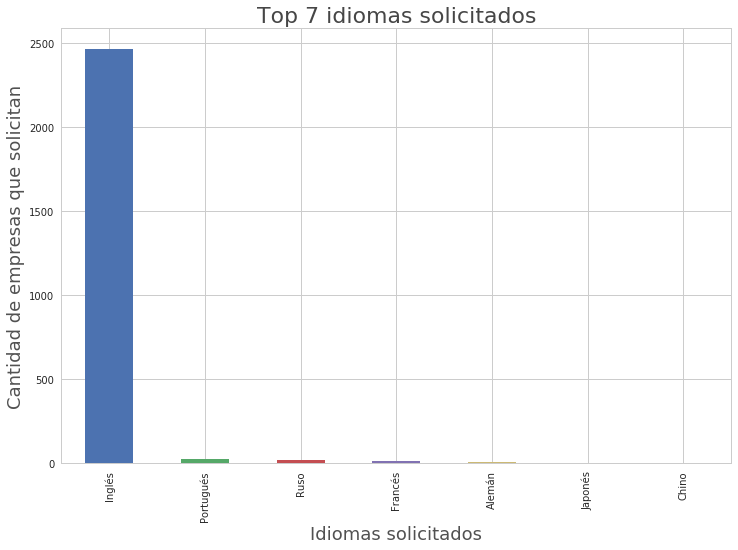

In [68]:
t7idiomas = av_det_idiomas['idiomas'].value_counts().sort_values(ascending=False)[1:8]
ax = t7idiomas.plot(kind='bar', figsize=(12,8),title='Top 7 idiomas solicitados')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_xlabel('Idiomas solicitados', fontsize=18, alpha=0.8)
ax.set_ylabel('Cantidad de empresas que solicitan', fontsize=18, alpha=0.8)

# Análisis de palabras más usadas en la descripción (WordCloud)
Para realizarlo utilizamos PySpark analizando en la columna descripción las 100 palabras más utilizadas.
El código no lo ponemos en este notebook por no ser relevante pero adjuntamos el link a continuación: https://github.com/lucioll/NaventDatosTP/blob/master/Pyspark/Pyspark%20para%20avisos_detalles.ipynb

WordCloud sobre los titulos

![alternate text](https://raw.githubusercontent.com/lucioll/NaventDatosTP/master/Pyspark/World%20Cloud%20para%20titulos%20BW.png?token=AO-uESOxr8dM6HW3ZChR3uCQN_QJoXRKks5a3WWrwA%3D%3D)

WordCloud sobre las descripciones

![alternate text](https://raw.githubusercontent.com/lucioll/NaventDatosTP/master/Pyspark/World%20Cloud%20para%20descripciones%20COLOR.png?token=AO-uEZKvkMJ93N5KYzidHrBbIKT7rg6Uks5a3WXGwA%3D%3D)